Запуск программы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 

In [2]:
import subprocess
from pprint import pprint

In [3]:
cmd = [f'mkdir -p bin; mkdir -p config; mkdir -p data; mkdir -p graphs']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr.decode())

In [4]:
cmd = [f'g++ -o ./bin/oscill double_oscill.cpp']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr.decode())

Входные данные симулятора


In [24]:
#setup config
cpp_config_path = "config/config.json"
config_data = {}

config_data['m'] = 1 #масса груза
config_data['omega'] = 50 #циклическая частота колебаний нижнего рычага
config_data['amp'] = 0.1 # амплитуда колебаний нижнего рычага

config_data['phi'] = config_data['amp']
config_data['psi'] = 0.1 # угол отклонения маятника от вертикали
config_data['vel_phi'] = 0
config_data['vel_psi'] = 0

config_data['time_div'] = 0.01 # шаг по времени алгоритма
config_data['time_begin'] = 0
config_data['time_end'] = 200

config_data['m1'] = 1
config_data['m2'] = 1
config_data['l1'] = 200 # длина нижнего рычага
config_data['l2'] = 100 # длина подвеса маятника
config_data['g'] = 1 # напряженность внешнего силового поля

config_data['outfile'] = "data/data.csv"
config_data['method'] = "rk4"
config_data['type'] = "kapitza"
config_data['dump'] = 1

Запуск рассчета

In [25]:
with open(cpp_config_path, 'w') as outfile:
    json.dump(config_data, outfile)
cmd = [f'./bin/oscill {cpp_config_path}']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr)

 b''


эта часть в работе не используется

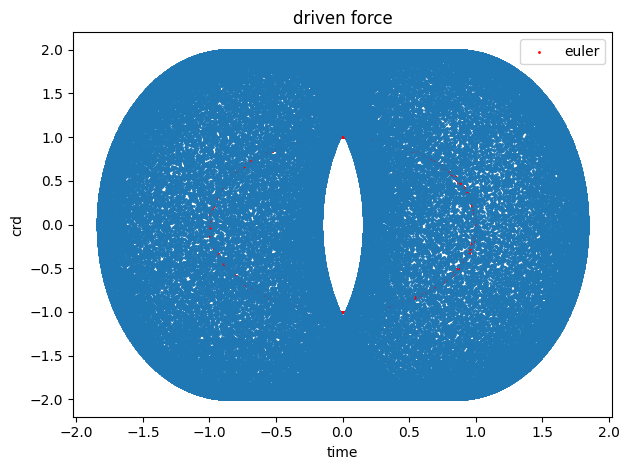

In [157]:
# df = pd.read_csv(config_data['outfile'])

# fig, ax = plt.subplots()

# ax.scatter(np.sin(df['psi']), -np.cos(df['psi']), color = 'r', label = 'euler', s = 1)
# ax.scatter(np.sin(df['phi']) + np.sin(df['psi']), -np.cos(df['psi'])- np.cos(df['psi']), s = 1)

# ax.set_xlabel('time')
# ax.set_ylabel('crd')
# ax.set_title(f'driven force')
# fig.tight_layout()
# ax.legend()
# fig.savefig(f'graphs/driven_force.png')

Двойной маятник

In [172]:
import pygame
 
pygame.init()
 
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)
 
dis = pygame.display.set_mode((600, 600))
 
game_over = False
clock = pygame.time.Clock()
pygame.display.set_caption('Oscillator')
 

df1 = pd.read_csv("data/data1.csv")
df2 = pd.read_csv("data/data2.csv")
dis.fill(white)
for i in range(len(df1)):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_over = True
    l1 = config_data['l1']
    l2 = config_data['l2']
    x1 = np.sin(df1['phi'][i]) * l1
    y1 = -np.cos(df1['phi'][i]) * l1
    x2 = np.sin(df1['phi'][i]) * l1 + np.sin(df1['psi'][i]) * l2
    y2 = -np.cos(df1['phi'][i]) * l1- np.cos(df1['psi'][i]) * l2
    x1 += 300
    x2 += 300
    y1 += 300
    y2 += 300
    
    x12 = np.sin(df2['phi'][i]) * l1
    y12 = -np.cos(df2['phi'][i]) * l1
    x22 = np.sin(df2['phi'][i]) * l1 + np.sin(df2['psi'][i]) * l2
    y22 = -np.cos(df2['phi'][i]) * l1- np.cos(df2['psi'][i]) * l2
    x12 += 300
    x22 += 300
    y12 += 300
    y22 += 300
    #dis.fill(white)
    #pygame.draw.circle(dis, red, (x1, y1), 2)
    pygame.draw.circle(dis, red, (x2, y2), 2)
    #pygame.draw.line(dis, red, (x1, y1), (x2, y2), 5)
    #pygame.draw.line(dis, red, (300, 300), (x1, y1), 5)

    #pygame.draw.circle(dis, blue, (x12, y12), 2)
    pygame.draw.circle(dis, blue, (x22, y22), 2)
    #pygame.draw.line(dis, blue, (x12, y12), (x22, y22), 5)
    #pygame.draw.line(dis, blue, (300, 300), (x12, y12), 5)

    pygame.display.update()
    clock.tick(100)
    if game_over:
        break

pygame.quit()

Маятник Капицы. Визуализация

In [23]:
import pygame
 
pygame.init()
 
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)
 
dis = pygame.display.set_mode((600, 600))
 
game_over = False
clock = pygame.time.Clock()
pygame.display.set_caption('Kapitza\'s oscillator')
 

df = pd.read_csv("data/data.csv")
for i in range(len(df)):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_over = True
    l1 = config_data['l1']
    l2 = config_data['l2']
    x1 = np.cos(df['phi'][i]) * l1
    y1 = -np.sin(df['phi'][i]) * l1
    x2 = np.cos(df['phi'][i]) * l1 - np.sin(df['psi'][i]) * l2
    y2 = -(np.sin(df['phi'][i]) * l1 + np.cos(df['psi'][i]) * l2)
    x1 += 300
    x2 += 300
    y1 += 300
    y2 += 300
    dis.fill(white)
    pygame.draw.line(dis, red, (x1, y1), (x2, y2), 5)
    pygame.draw.line(dis, red, (300, 300), (x1, y1), 5)
    pygame.draw.circle(dis, black, (x1, y1), 5)
    pygame.draw.circle(dis, black, (x2, y2), 5)
    pygame.draw.circle(dis, black, (300, 300), 5)

    pygame.display.update()
    clock.tick(100)
    if game_over:
        break

pygame.quit()